You will make two functions.  I will supply the names and informal descriptions of the functions.  You will supply the rest of the documentation and the code. Part of the assignment requires the use of loops. If you have never used a loop before then *type along* with this [video clip](https://www.youtube.com/watch?v=_cHYXOq8ddM) (I make video clips when I think typing along is absolutely essential).  If you've used loops often, then you may be able to skip it.

In [26]:
import numpy as np
from PIL import Image

In [27]:
def schur_sum(arr , weight):  
    """
    Takes an array and weight through the parameters to calculate the Schur Product.
    It takes the sum of entries of arr and weight, within the bounds of the area of 
    'weight'.
    
    Parameters
    ----------
    arr , weight : 2D arrays
    
    Returns
    -------
    2D array
    """
    arr_row_ct, arr_col_ct = arr.shape
    wt_row_ct, wt_col_ct = weight.shape
    bound_row=arr_row_ct-wt_row_ct+1
    bound_col=arr_col_ct-wt_row_ct+1
    result=np.ones((bound_row, bound_col))
    
    for i in range(bound_row):
        for j in range(bound_col):
            sarr = arr[i:i+wt_row_ct, j:j+wt_col_ct]
            result[i,j]=np.sum(sarr*weight)

    return result

In [28]:
arr = np.array([[-1,2,3,1],[5,6,1,2],[3,0,1,4]])
wt = np.array([[1,0.5],[0.5,1]])
print(schur_sum(arr, wt))

[[8.5 7.5 6. ]
 [9.5 7.5 6.5]]


The entrywise product of matrices is sometimes called the Schur Product after [Issai Schur](https://en.wikipedia.org/wiki/Issai_Schur), hence the name of the function

schur_sum should perform the operation we described during the first 20 minutes of class on Monday September 30.  In particular recall an example:

$A = \left[ \begin{array}{rrrr} -1 & 2 & 3 & 1\\ 5 & 6 & 1 & 2\\ 3 & 0 & 1 & 4  \end{array} \right]$, $W = \left[ \begin{array}{cc} 1 & 0.5 \\ 0.5 & 1  \end{array}   \right]$

Then schur_sum(A,W) first takes the 'dot product' (as described in lecture) of W and A[0:2,0:2]. Then it loops through the columns doing the same thing until it runs out of columns.  Then it loops through the rows to create:

schur_sum(A,W) = $\left[ \begin{array}{ccc} 8.5 & 7.5 & 6\\ 9.5 & 7.5 & 6.5     \end{array}   \right].$

You should expect a nested loop in schur_sum

### Do not begin this asignment until you work out the above example by hand and get the same thing !!

## Extensively test schur_sum and get it working before you read anything below this cell

In [29]:
def zero_pad(arr,prow,pcol):
    """
        m,n = arr.shape.  Makes an array of size (m+prow)x(n+pcol),
             centers arr in the middle of the new array, and all other
             entries are set to 0. (The int(prow/2) stuff we talked 
             about should come in handy)

        Parameters:
            arr : 2D array
            prow, pcol : int

        Returns:
            2D array
    """
    n=arr.shape[1]
    m=arr.shape[0]
    row_interval = prow // 2
    col_interval = pcol // 2
    padded_array = np.zeros((m+prow, n+pcol))
    padded_array[row_interval:row_interval + m, col_interval:col_interval + n]=arr
    
    return padded_array
	
def replicate_pad(arr,prow,pcol):
    """
        m,n = arr.shape. Makes an array of size (m+prow)x(n+pcol),centers arr in the
             middle of the new array, and then performs the replication padding as we
             did in lecture on Wednesday, Sept. 13

        Parameters:
            arr : 2D array
            prow, pcol : int

        Returns:
            2D array
    """
    n=arr.shape[1]
    m=arr.shape[0]
    row_interval = prow // 2
    col_interval = pcol // 2
    # init
    padded_array = np.ones((m+prow, n+pcol))
    # centering
    padded_array[row_interval:row_interval + m, col_interval:col_interval + n]=arr
    # top row replication
    padded_array[:row_interval,col_interval:col_interval+n]=arr[0,:]
    # bottom row replication
    padded_array[row_interval + m:, col_interval:col_interval + n] = arr[-1, :]
    # left column replication
    padded_array[:, :col_interval] = padded_array[:, col_interval:col_interval + 1]
    # right column replication
    padded_array[:, col_interval + n:] = padded_array[:, col_interval + n - 1:col_interval + n]
    
    return padded_array

In [77]:
def slow_filter(im, weight):
    """
    Takes a given image and kernel through the parameters to perform a convolution operation
    implemented using a sliding window technique. The 'weight' will center on an entry of the
    image array (a pixel) and will compute the weighted sum of pixel values within its area
    on each step, as it iterates across and down the image array within its bounds.
    
    Parameters
    ----------
    im : PIL Image
    weight : 2D array
    
    Returns
    -------
    PIL Image of the same size as im
    """
    imarr=np.array(im).astype(np.float64)
    channels=imarr.shape[2]
    pad_row=weight.shape[0]-1
    pad_col=weight.shape[1]-1
    if (channels==2):
        pad_arr = replicate_pad(imarr, pad_row, pad_col)
        aug_img = schur_sum(pad_arr, weight)
    elif (channels==3):
        aug_img_ch=[]
        for i in range(3):
            ch = imarr[:,:,i]
            pad_ch=replicate_pad(ch, pad_row, pad_col)
            aug_ch = schur_sum(pad_ch,weight)
            aug_img_ch.append(aug_ch)
        aug_arr=np.stack(aug_img_ch, axis=2)

    aug_arr=np.clip(aug_arr,0,255).astype(np.uint8)
    
    aug_img=Image.fromarray(aug_arr)
    return aug_img

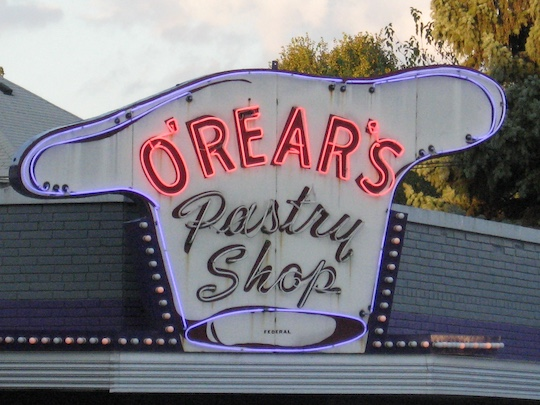

In [87]:
im=Image.open('pastry.JPG')
im

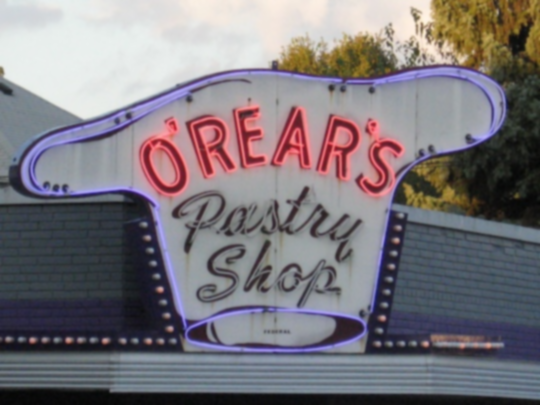

In [91]:
# weak gaussian filter
wt=np.array([[1, 4, 7, 4, 1],
           [4, 16, 26, 16, 4],
           [7, 26, 41, 26, 7],
           [4, 16, 26, 16, 4],
           [1, 4, 7, 4, 1]]) / 273
slow_filter(im,wt)

As the name suggests this function may require some time to run.  So test it on small images.  I included one called 'pastry.jpg'.

The math of slow_filter:  Calculates schur_sum of the weight and each channel of a replicate_padded version of im_array (recall we worked out the annoying arithmetic of this in lecture on Monday, September 30).  You should expect to loop over the three channels.

As ALWAYS extensively test your functions.  For an averaging filter, weight = (1/n\*\*2)\*np.ones((n,n)) you should expect a blurring effect.  So try this on 'pastry.jpg' with different values of n (<10 should be fine) and see if you observe this.

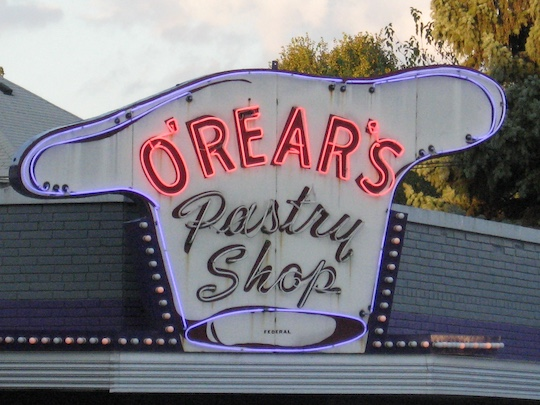

In [85]:
im